# Gradient Descent

In this exercise, you will learn how to use gradient descent to solve a linear regression problem.

* Let the variables $x$ and $y$ be the input and output of a linear function, respectively. Let $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ be $n$ data points.
* Our aim is to estimate a function $f$ such that $f(x)$ is a good prediction for $y$.

## 1. Creating Data
We begin by creating synthetic data from a linear function (y = 1 + 5x) with some Gaussian noise added.

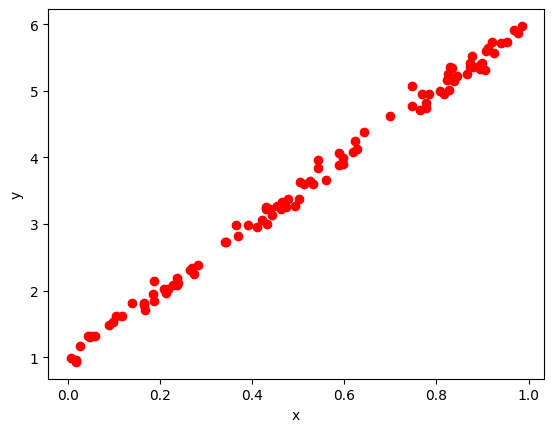

In [1]:
import numpy as np
import numpy.linalg as lng
import matplotlib.pyplot as plt

# Generate data
x = np.random.rand(100,1)
y = 1 + 5 * x + 0.1 * np.random.randn(100, 1)

# Visualize the data
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Loss Function

* Assuming we are using a linear model $f(x)= w_0 + w_1 x$, then our goal is to estimate the coefficients $w_0$ and $w_1$. Here, the model is a linear function with respect to the coefficients $w_0$ and $w_1$.
* Let $\hat{y}_i = w_0 + w_1 x_i$ be the prediction for input $x_i$, and $e_i = y_i - \hat{y}_i$ represent the difference between the $i$-th target and the prediction by our linear model. Then the squared error is denoted as: 
<p style="text-align: center;">$E = \frac{1}{2} \sum_{i=1}^{N}e_i^2 =  \frac{1}{2} \sum_{i=1}^{N}(y_i - w_0 - w_1 x_i)^2$</p>

## Calculate the gradient

Recall that gradient descenta adjust the weights in such a way as to take us in the steepest downhill direction with the formula: <br />
<p style="text-align: center;">$w \leftarrow w-\eta \frac{\partial E}{\partial w}$.</p>
Where $\eta$ is the learning rate. <br />
Hence we need to calculate the partial derivatives for $w_0$ and $w_1$ respect to the error $E$:
<p style="text-align: center;">$\frac{\partial E}{\partial w_0} = -\sum_{i=1}^{N}(y_i - w_0 - w_1 x_i)$</p>
<p style="text-align: center;">$\frac{\partial E}{\partial w_1} = -\sum_{i=1}^{N}(y_i - w_0 - w_1 x_i)\,x_i$</p> <br />
We can then use the above formulas to do the gradient descent. However, before we start the implementation, for computational efficiency, we'll use the vector/matrix form to denote those data and weights.

* Denote $\mathbf{x}$ as a matrix $\begin{bmatrix}
    1       & 1 & 1 & \dots & 1 \\
    x_1       & x_2 & x_3 & \dots & x_n
\end{bmatrix}^{\top}$, $\mathbf{y} = [y_1,\cdots,y_n]^{\top}$, $\mathbf{w} = [w_0,w_1]^{\top}$.
* We have the predictions $\hat{\mathbf{y}} = \mathbf{x} \mathbf{w}$.
* Then, the squared error $E = \frac{1}{2}\|\mathbf{y}-\hat{\mathbf{y}}\|_2^2=\frac{1}{2}\|\mathbf{y}- \mathbf{x} \mathbf{w}\|_2^2$, where $\|\cdot\|_2$ is $l_2$ norm of a vector.
* Similarly, the partial derivatives can be represented as 
<p style="text-align: center;">$\frac{\partial \mathbf{E}}{\partial \mathbf{w}} = -\mathbf{x}^{\top}(\mathbf{y}- \mathbf{x} \mathbf{w})$</p>

Now we can start implementing the gradient descent algorithm with the following formula:
<p style="text-align: center;">$\mathbf{w} \leftarrow \mathbf{w}-\eta \frac{\partial \mathbf{E}}{\partial \mathbf{w}} = \mathbf{w} + \eta\, \mathbf{x}^{\top} (\mathbf{y}- \mathbf{x} \mathbf{w})$.</p>
Where $\eta$ is the learning rate. <br />

[[0.99450009]
 [5.01743507]]


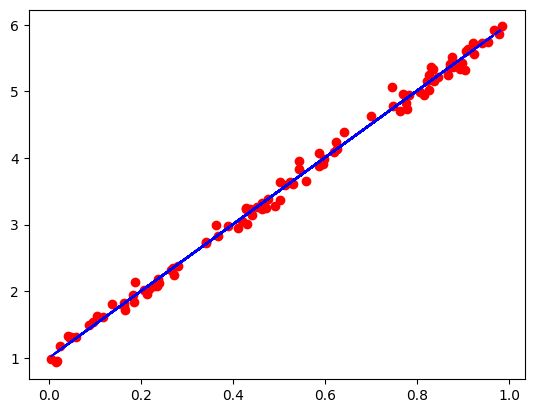

In [2]:
# Vectorize x and y
n = len(x)
X = np.ones((n, 2))
Y = np.zeros((n, 1))
for i in range(n):
    X[i][1] = x[i]
    Y[i] = y[i]
    
# initialize weights
w = np.zeros((2, 1))

# Set learning rate
eta = 1e-3

# max number of iterations
maxiter = 1000

iters = 0

while (iters < maxiter):
    res = Y - np.dot(X, w)
    grad = -np.dot(np.transpose(X), res)
    w_new = w - eta * grad
    w = w_new
    iters += 1
    
# Print estimated weights
print(w)


# Visualize the data
pred_y = np.dot(X, w)
plt.plot(x, y,'ro', x, pred_y, 'b--')